<>:17: SyntaxWarning: invalid escape sequence '\C'
<>:17: SyntaxWarning: invalid escape sequence '\C'
C:\Users\KUNDAN\AppData\Local\Temp\ipykernel_173672\1552398017.py:17: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("E:\College\Sem 5\SPM\Project 2\data\Synthetic_Transportation_Dataset_Expanded_v2.csv")


✅ Dataset Loaded! Shape: (5500, 17)
   Record_ID         Timestamp   Latitude  Longitude Road_ID  Vehicle_Count  \
0          1  03-10-2023 09:50  32.004714  76.971961  RD-285            419   
1          2  09-06-2019 08:01  10.632732  77.828652  RD-384            232   
2          3  08-01-2020 01:38  12.258165  88.810189  RD-282            339   
3          4  18-10-2022 05:43  34.289950  95.415253  RD-128             74   
4          5  29-06-2023 23:11  31.698993  77.675486   RD-49            187   

   Avg_Speed(km/h) Vehicle_Type Traffic_Density Weather  Visibility(m)  \
0               90        Mixed          Medium     Fog           5663   
1              104        Mixed       Very High    Rain            896   
2              100          Bus          Medium   Storm           9369   
3               63          Car             Low   Clear           2510   
4               73        Mixed             Low   Storm           3447   

      Road_Condition Accident_Occurred Accid

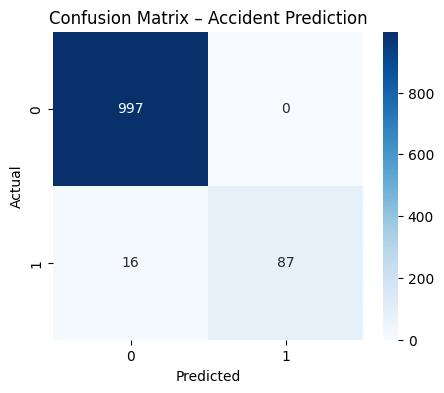

✅ Models saved successfully in /models folder.


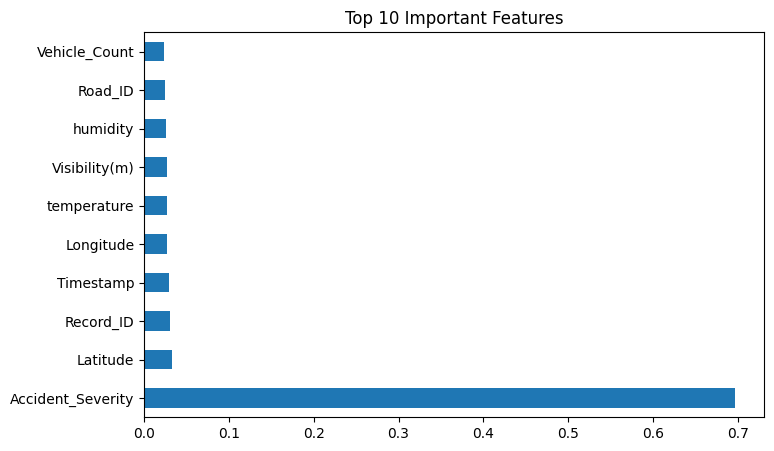

🏁 Training Complete!


In [4]:
# ==============================================
# 🚗 AI Transport System – Model Training Script
# ==============================================

# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2️⃣ Load Dataset
df = pd.read_csv("E:\College\Sem 5\SPM\Project 2\data\Synthetic_Transportation_Dataset_Expanded_v2.csv")
print("✅ Dataset Loaded! Shape:", df.shape)
print(df.head())

# 3️⃣ Basic Cleaning
df = df.copy()
df.fillna(0, inplace=True)

# Convert categorical/text columns to numeric
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category").cat.codes

# 4️⃣ Define Features & Target
target = "Accident_Occurred"
if target not in df.columns:
    raise ValueError(f"❌ Column '{target}' not found in dataset.")

X = df.drop(columns=[target])
y = df[target].astype(int)

# 5️⃣ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)

# 6️⃣ Train Random Forest Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 7️⃣ Evaluation
y_pred = model.predict(X_test)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Accident Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8️⃣ Save Models
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/accident_model.joblib")
joblib.dump(model, "models/alert_model.joblib")
print("✅ Models saved successfully in /models folder.")

# 9️⃣ Feature Importance Plot (optional)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

print("🏁 Training Complete!")
